In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.options.display.max_rows = 999


# Data Exploration, why bother?

Why bother about data exploration, can't we just throw all data into an AI algorithm and get going?

We all wish it was that easy, however in reality you do need a clear understanding of the data to create great machine learning.

Also, we need to know which columns should be numeric and which columns might have to be processed before we can use it in a machine learning algorithm.

It's also very good to know which features correlate with the target variable. When we better understand our data we can spend our time more effectively building features.

Also take a look at the data dictionary and skim through the explanations. The data dictionary is in the data folder.


In [2]:
train_data = pd.read_csv('data_assignment2/train_fact.csv')

In [3]:
list(train_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [4]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_data.isnull().sum() #checking for total null values, eg. missing data

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         1
AMT_GOODS_PRICE                    38
NAME_TYPE_SUITE                   192
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32951
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

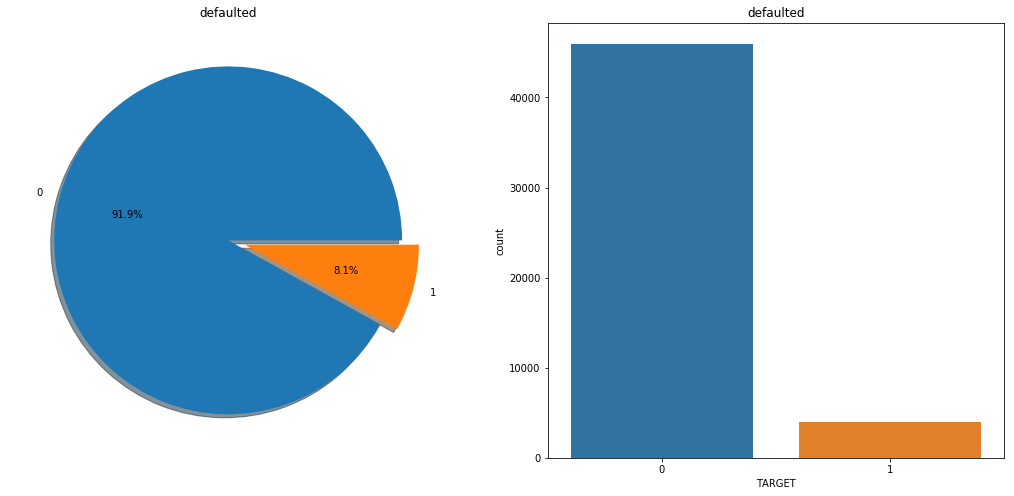

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('defaulted')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=train_data,ax=ax[1])
ax[1].set_title('defaulted')
plt.show()

It seems that there are way more people that didn't default then did, which is quite straightforward if a business wants to make money.

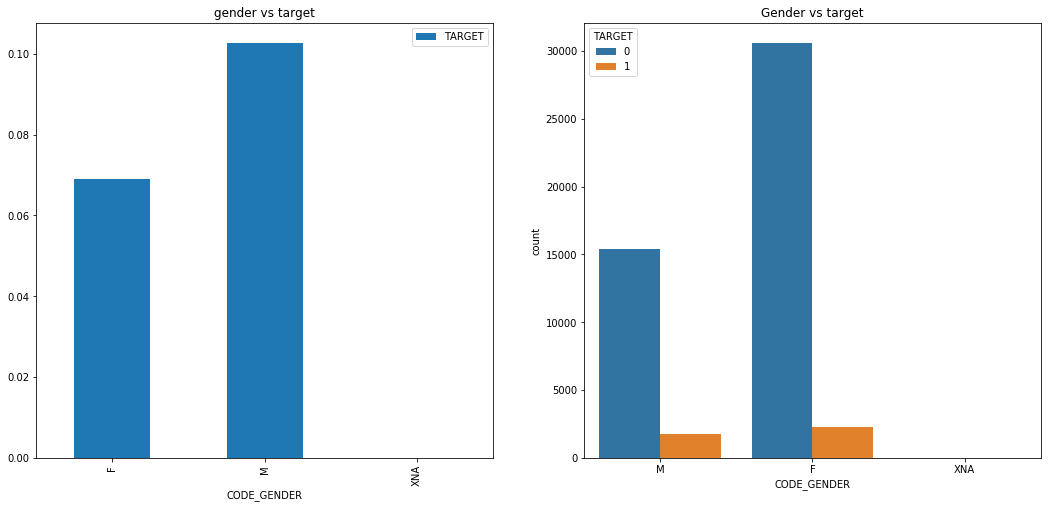

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER']).mean().plot.bar(ax=ax[0])
ax[0].set_title('gender vs target')
sns.countplot('CODE_GENDER',hue='TARGET',data=train_data,ax=ax[1])
ax[1].set_title('Gender vs target')
plt.show()

So statistically speaking males default more often.

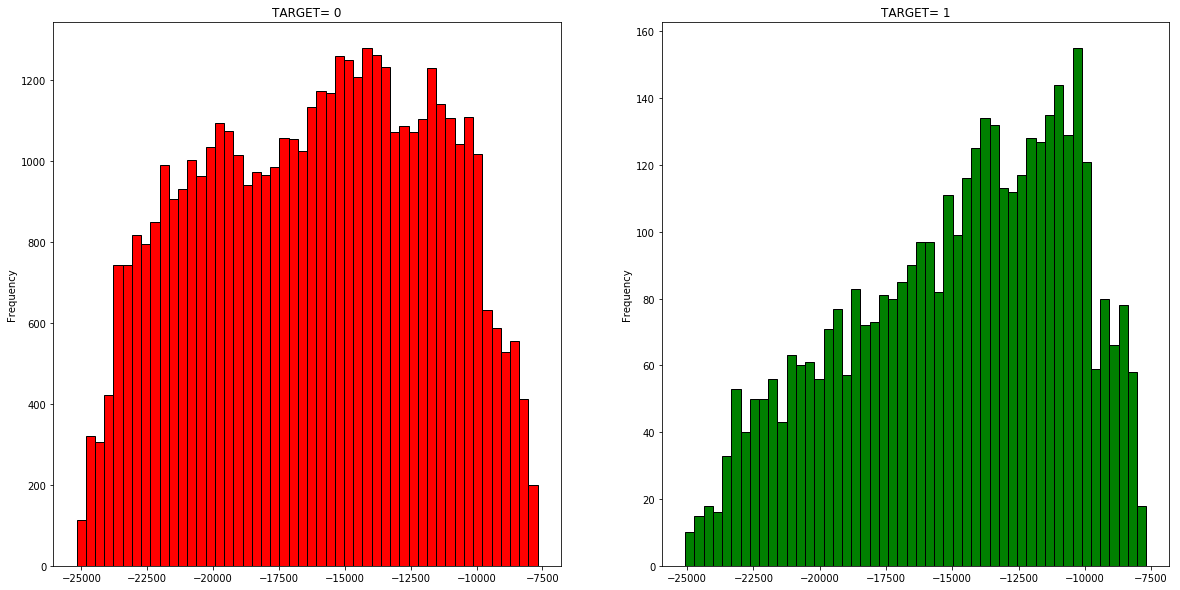

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train_data[train_data['TARGET']==0].DAYS_BIRTH.plot.hist(ax=ax[0],bins=50,edgecolor='black',color='red')
ax[0].set_title('TARGET= 0')
train_data[train_data['TARGET']==1].DAYS_BIRTH.plot.hist(ax=ax[1],color='green',bins=50,edgecolor='black')
ax[1].set_title('TARGET= 1')
plt.show()

Since the DAYS BIRTH variable is relative to the loan application, meaning that -25000 means 25000 days ago.

So it seems that younger people tend to default more often.

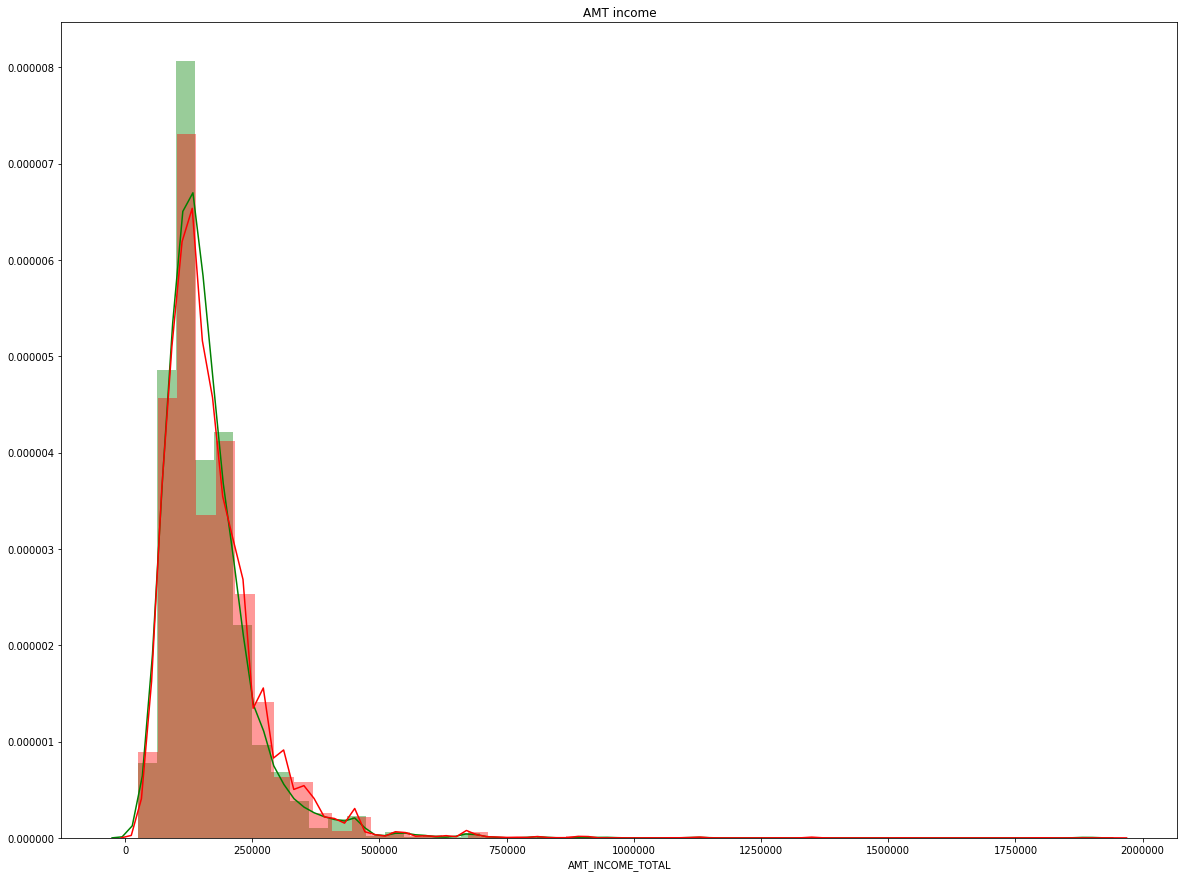

In [8]:
f=plt.figure(figsize=(20,15))
sns.distplot(train_data[(train_data['TARGET']==1) & (train_data['AMT_INCOME_TOTAL'] < 2000000)].AMT_INCOME_TOTAL.dropna(), 
             color='green').set_title('AMT income')
sns.distplot(train_data[(train_data['TARGET']==0) & (train_data['AMT_INCOME_TOTAL'] < 2000000)].AMT_INCOME_TOTAL.dropna(),
             color='red')


Not that much to be seen here unfortunately..

The external dataset is loan application history from external banks, prev_filtered are loan applications from same company (home credit).

In [52]:
ext_df = pd.read_csv('data_assignment2/external_data.csv')
prev_df = pd.read_csv('data_assignment2/prev_filtered.csv')

In [57]:
ext_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,136226,5714502,Active,currency 1,-521,0,551.0,NaN,NaN,0,112500.000,0.000,0.000,0.0,Credit card,-30,NaN
1,136226,5714503,Closed,currency 1,-559,0,NaN,-355.0,0.000,0,110250.000,0.000,0.000,0.0,Credit card,-351,NaN
2,119939,5714566,Closed,currency 1,-2279,0,-1945.0,-2033.0,0.000,0,39541.500,0.000,0.000,0.0,Consumer credit,-2033,NaN
3,119939,5714567,Closed,currency 1,-2247,0,-1123.0,-1733.0,0.000,0,135000.000,0.000,0.000,0.0,Credit card,-1733,NaN
4,119939,5714568,Closed,currency 1,-1447,0,-331.0,-1272.0,0.000,0,99000.000,-2692.170,137692.170,0.0,Credit card,-1272,NaN
5,119939,5714569,Closed,currency 1,-1390,0,-331.0,-1263.0,0.000,0,135000.000,-149.040,135149.040,0.0,Credit card,-1263,NaN
6,119939,5714570,Active,currency 1,-1390,0,-696.0,NaN,0.000,0,4500.000,-2.565,2.565,0.0,Credit card,-691,NaN
7,119939,5714571,Active,currency 1,-733,0,1100.0,NaN,0.000,0,337500.000,242596.395,94903.605,0.0,Credit card,-687,NaN
8,119939,5714573,Closed,currency 1,-1188,0,1369.0,-1090.0,NaN,0,450000.000,0.000,0.000,0.0,Consumer credit,-429,NaN
9,119939,5714574,Closed,currency 1,-437,0,1389.0,-225.0,NaN,0,1226250.000,0.000,0.000,0.0,Consumer credit,-194,NaN


In [58]:
prev_df

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,NaN,607500.000,THURSDAY,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
1,2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,NaN,112500.000,TUESDAY,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
2,15,1232483,151612,Consumer loans,21307.455,126490.500,119853.000,12649.500,126490.500,TUESDAY,...,Industry,6.0,low_normal,POS other with interest,365243.0,-668.0,-518.0,-518.0,-512.0,0.0
3,16,2163253,154602,Consumer loans,4187.340,26955.000,27297.000,1350.000,26955.000,SATURDAY,...,Consumer electronics,8.0,high,POS household with interest,365243.0,-1440.0,-1230.0,-1230.0,-1226.0,0.0
4,44,2675386,118974,Consumer loans,6899.490,55831.500,60745.500,0.000,55831.500,SUNDAY,...,Connectivity,10.0,low_normal,POS mobile without interest,365243.0,-272.0,-2.0,365243.0,365243.0,1.0
5,63,1074341,137179,Cash loans,NaN,0.000,0.000,NaN,NaN,FRIDAY,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
6,93,2522811,120854,Revolving loans,33750.000,0.000,675000.000,NaN,NaN,THURSDAY,...,XNA,0.0,XNA,Card X-Sell,-332.0,-297.0,365243.0,365243.0,365243.0,0.0
7,96,2030030,133853,Consumer loans,7253.055,104809.500,121410.000,0.000,104809.500,SATURDAY,...,Consumer electronics,18.0,low_action,POS household without interest,365243.0,-315.0,195.0,365243.0,365243.0,0.0
8,101,1196771,127624,Cash loans,49186.800,1170000.000,1170000.000,NaN,1170000.000,FRIDAY,...,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
9,103,1247611,119539,Cash loans,19011.600,405000.000,405000.000,NaN,405000.000,FRIDAY,...,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN


# Your turn!

What insights can you get from the data?

Try to explore the three tables and try to understand what variables there are, what are their distributions, null count, correlation with the target.

Really understanding the data will greatly help you in the next steps!

- Can you find more correlations between certain variables and the target in the main table?
- How should we interpret the historical data and how does it look like (distributions etc)?
- Can we see correlations between variables?
- Do you understand how these different tables are related to each other?